In [227]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

# General Exploration

In [228]:
data = pd.read_excel("HackathonData.xlsx")

In [229]:
data.head()

,Encoded_SKU_ID,SALES_DATE,SUBCLASS_NAME,CLASS_NAME,ML_NAME,CATEGORY_NAME,RETAIL_PRICE,PROMO_PRICE,COMPETITOR_PRICE,Inventory,DAILY_UNITS
0,1,2017-09-28,MISC CAMERA ACCES,DIGITAL CAMERA ACCY,ML - DI Accessories,VP - Digital Imaging,89.99,?,?,Fully-Stocked,1
1,2,2017-11-24,CAMERA BATTERIES,DIGITAL CAMERA ACCY,ML - DI Accessories,VP - Digital Imaging,39.99,?,?,Fully-Stocked,18
2,3,2019-11-28,SO PARTS,MOBILE ACCESSORIES,ML - Connected Car,VP - Electrify & Car,49.99,?,46.98,Constrained,7
3,4,2021-04-21,SO RANGEHOODS REG,KITCHEN VENTILATION,ML - Kitchen,VP - Major Appliances,549.99,?,498,Fully-Stocked,6
4,1,2018-10-27,MISC CAMERA ACCES,DIGITAL CAMERA ACCY,ML - DI Accessories,VP - Digital Imaging,89.99,?,?,Fully-Stocked,7


In [230]:
data.columns = [c.lower() for c in data.columns]

In [231]:
data.shape

(846632, 11)

In [232]:
data.encoded_sku_id.nunique()

575

In [233]:
data.nunique()

encoded_sku_id       575
sales_date          1891
subclass_name        116
class_name            25
ml_name                8
category_name          3
retail_price         509
promo_price          636
competitor_price    5557
inventory              4
daily_units         1465
dtype: int64

In [234]:
data[data.daily_units <= 0].sort_values('encoded_sku_id')

,encoded_sku_id,sales_date,subclass_name,class_name,ml_name,category_name,retail_price,promo_price,competitor_price,inventory,daily_units
340499,1,2022-06-14,MISC CAMERA ACCES,DIGITAL CAMERA ACCY,ML - DI Accessories,VP - Digital Imaging,89.99,?,68.9,Fully-Stocked,0
123764,1,2022-04-17,MISC CAMERA ACCES,DIGITAL CAMERA ACCY,ML - DI Accessories,VP - Digital Imaging,89.99,?,?,Fully-Stocked,0
123754,1,2017-11-23,MISC CAMERA ACCES,DIGITAL CAMERA ACCY,ML - DI Accessories,VP - Digital Imaging,89.99,?,?,Fully-Stocked,0
329964,1,2020-03-27,MISC CAMERA ACCES,DIGITAL CAMERA ACCY,ML - DI Accessories,VP - Digital Imaging,89.99,?,?,Fully-Stocked,0
650960,1,2021-07-18,MISC CAMERA ACCES,DIGITAL CAMERA ACCY,ML - DI Accessories,VP - Digital Imaging,89.99,?,69,Fully-Stocked,0
...,...,...,...,...,...,...,...,...,...,...,...
77918,575,2022-04-18,INSTANT PRINT HW,CAMERAS - P&S,ML - P&S and Action Cams and Drones,VP - Digital Imaging,149.99,?,?,Fully-Stocked,0
463432,575,2020-09-07,INSTANT PRINT HW,CAMERAS - P&S,ML - P&S and Action Cams and Drones,VP - Digital Imaging,149.99,?,?,Fully-Stocked,0
214033,575,2022-07-28,INSTANT PRINT HW,CAMERAS - P&S,ML - P&S and Action Cams and Drones,VP - Digital Imaging,149.99,?,?,Fully-Stocked,0
36065,575,2022-06-16,INSTANT PRINT HW,CAMERAS - P&S,ML - P&S and Action Cams and Drones,VP - Digital Imaging,149.99,?,129,Fully-Stocked,0


In [235]:
data[data.encoded_sku_id == 3].sort_values('sales_date')

,encoded_sku_id,sales_date,subclass_name,class_name,ml_name,category_name,retail_price,promo_price,competitor_price,inventory,daily_units
325145,3,2017-06-04,SO PARTS,MOBILE ACCESSORIES,ML - Connected Car,VP - Electrify & Car,49.99,?,?,Out-of-Stock,0
815915,3,2017-06-05,SO PARTS,MOBILE ACCESSORIES,ML - Connected Car,VP - Electrify & Car,49.99,?,?,Out-of-Stock,0
477480,3,2017-06-06,SO PARTS,MOBILE ACCESSORIES,ML - Connected Car,VP - Electrify & Car,49.99,?,?,Out-of-Stock,0
842142,3,2017-06-07,SO PARTS,MOBILE ACCESSORIES,ML - Connected Car,VP - Electrify & Car,49.99,?,?,Out-of-Stock,1
454529,3,2017-06-08,SO PARTS,MOBILE ACCESSORIES,ML - Connected Car,VP - Electrify & Car,49.99,?,?,Out-of-Stock,1
...,...,...,...,...,...,...,...,...,...,...,...
571301,3,2022-07-27,SO PARTS,MOBILE ACCESSORIES,ML - Connected Car,VP - Electrify & Car,49.99,?,40.84,Out-of-Stock,2
218263,3,2022-07-28,SO PARTS,MOBILE ACCESSORIES,ML - Connected Car,VP - Electrify & Car,49.99,?,40.84,Fully-Stocked,0
689733,3,2022-07-29,SO PARTS,MOBILE ACCESSORIES,ML - Connected Car,VP - Electrify & Car,49.99,?,?,Fully-Stocked,0
261896,3,2022-07-30,SO PARTS,MOBILE ACCESSORIES,ML - Connected Car,VP - Electrify & Car,49.99,?,40.84,Constrained,1


In [236]:
data[(data.encoded_sku_id == 3)&(data.sales_date >= "2019-08-06")].sort_values('sales_date').head(20)


,encoded_sku_id,sales_date,subclass_name,class_name,ml_name,category_name,retail_price,promo_price,competitor_price,inventory,daily_units
780518,3,2019-08-06,SO PARTS,MOBILE ACCESSORIES,ML - Connected Car,VP - Electrify & Car,49.99,?,47.34,Constrained,5
431922,3,2019-08-07,SO PARTS,MOBILE ACCESSORIES,ML - Connected Car,VP - Electrify & Car,49.99,?,?,Fully-Stocked,-1
57284,3,2019-08-08,SO PARTS,MOBILE ACCESSORIES,ML - Connected Car,VP - Electrify & Car,49.99,?,?,Fully-Stocked,0
540893,3,2019-08-09,SO PARTS,MOBILE ACCESSORIES,ML - Connected Car,VP - Electrify & Car,49.99,?,?,Moderate,5
191033,3,2019-08-10,SO PARTS,MOBILE ACCESSORIES,ML - Connected Car,VP - Electrify & Car,49.99,?,?,Moderate,4
714166,3,2019-08-11,SO PARTS,MOBILE ACCESSORIES,ML - Connected Car,VP - Electrify & Car,49.99,?,?,Moderate,3
372387,3,2019-08-12,SO PARTS,MOBILE ACCESSORIES,ML - Connected Car,VP - Electrify & Car,49.99,?,48.95,Constrained,2
836119,3,2019-08-13,SO PARTS,MOBILE ACCESSORIES,ML - Connected Car,VP - Electrify & Car,49.99,?,?,Constrained,4
407521,3,2019-08-14,SO PARTS,MOBILE ACCESSORIES,ML - Connected Car,VP - Electrify & Car,49.99,?,?,Moderate,5
19987,3,2019-08-15,SO PARTS,MOBILE ACCESSORIES,ML - Connected Car,VP - Electrify & Car,49.99,?,?,Moderate,3


In [237]:
data[["encoded_sku_id","sales_date"]].drop_duplicates()

,encoded_sku_id,sales_date
0,1,2017-09-28
1,2,2017-11-24
2,3,2019-11-28
3,4,2021-04-21
4,1,2018-10-27
...,...,...
846627,67,2020-11-16
846628,482,2021-05-06
846629,384,2021-09-25
846630,113,2018-11-08


In [238]:
data[data["encoded_sku_id"] == 22].sort_values("sales_date")

,encoded_sku_id,sales_date,subclass_name,class_name,ml_name,category_name,retail_price,promo_price,competitor_price,inventory,daily_units
840802,22,2018-04-01,SO GAS COOKTOP REG,BUILT IN COOKING,ML - Kitchen,VP - Major Appliances,629.99,?,?,Fully-Stocked,0
553427,22,2018-04-02,SO GAS COOKTOP REG,BUILT IN COOKING,ML - Kitchen,VP - Major Appliances,629.99,499.99,?,Fully-Stocked,1
183996,22,2018-04-03,SO GAS COOKTOP REG,BUILT IN COOKING,ML - Kitchen,VP - Major Appliances,629.99,499.99,499,Fully-Stocked,2
614253,22,2018-04-04,SO GAS COOKTOP REG,BUILT IN COOKING,ML - Kitchen,VP - Major Appliances,629.99,499.99,?,Fully-Stocked,1
283897,22,2018-04-05,SO GAS COOKTOP REG,BUILT IN COOKING,ML - Kitchen,VP - Major Appliances,629.99,499.99,?,Fully-Stocked,1
...,...,...,...,...,...,...,...,...,...,...,...
12431,22,2022-07-27,SO GAS COOKTOP REG,BUILT IN COOKING,ML - Kitchen,VP - Major Appliances,999.99,699.99,698,Fully-Stocked,3
571100,22,2022-07-28,SO GAS COOKTOP REG,BUILT IN COOKING,ML - Kitchen,VP - Major Appliances,999.99,699.99,698,Fully-Stocked,3
137341,22,2022-07-29,SO GAS COOKTOP REG,BUILT IN COOKING,ML - Kitchen,VP - Major Appliances,999.99,699.99,698,Fully-Stocked,1
540551,22,2022-07-30,SO GAS COOKTOP REG,BUILT IN COOKING,ML - Kitchen,VP - Major Appliances,999.99,699.99,698,Moderate,8


In [239]:
data[data["promo_price"] != "?"]

,encoded_sku_id,sales_date,subclass_name,class_name,ml_name,category_name,retail_price,promo_price,competitor_price,inventory,daily_units
21,22,2022-07-18,SO GAS COOKTOP REG,BUILT IN COOKING,ML - Kitchen,VP - Major Appliances,999.99,699.99,698,Moderate,4
22,24,2019-01-24,DIGITAL CAMERAS,CAMERAS - P&S,ML - P&S and Action Cams and Drones,VP - Digital Imaging,369.99,338.99,338,Fully-Stocked,32
29,31,2020-02-06,MIRRORLESS CAMERAS,CAMERAS - ILC,ML - ILC Cameras/Lenses,VP - Digital Imaging,1799.99,1599.99,1598,Fully-Stocked,3
39,40,2021-07-08,TUNERS,SATELLITE RADIO HDWE,ML - Connected Car,VP - Electrify & Car,149.99,129.99,99.99,Fully-Stocked,14
44,46,2019-05-15,MIRRORLESS LENSES,LENSES,ML - ILC Cameras/Lenses,VP - Digital Imaging,999.99,899.99,898,Fully-Stocked,7
...,...,...,...,...,...,...,...,...,...,...,...
846574,128,2020-09-19,FRONT LOAD WASHER,LAUNDRY,ML - Laundry,VP - Major Appliances,1799.99,1349.99,1398,Constrained,26
846580,438,2019-12-02,DSLR CAMERAS,CAMERAS - ILC,ML - ILC Cameras/Lenses,VP - Digital Imaging,2399.99,2099.99,2099,Fully-Stocked,8
846594,399,2019-04-30,SO DISHWASHER REG,DISHWASHERS,ML - Kitchen,VP - Major Appliances,339.99,324.99,318,Moderate,4
846604,89,2022-04-26,SO TL GAS DRY BBHD,LAUNDRY,ML - Laundry,VP - Major Appliances,944.99,849.99,696,Moderate,3


# Processing 1

In [240]:
# Real price
data["real_price"] = data["promo_price"].apply(lambda x: float(x) if x != "?" else np.nan)
data["real_price"] = data["real_price"].fillna(data["retail_price"])


In [243]:
# Time features
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar
cal = calendar()
dt_series = pd.to_datetime(data["sales_date"], format="%Y-%m-%d")
holidays = cal.holidays(start=dt_series.min(), end=dt_series.max())

data["sales_date_dt"] = pd.to_datetime(data["sales_date"])
data["year"] = data["sales_date_dt"].dt.year
data["month"] = data["sales_date_dt"].dt.month
data["day"] = data["sales_date_dt"].dt.day
data["dayofweek"] = data["sales_date_dt"].dt.dayofweek
data["weekofyear"] = data["sales_date_dt"].dt.isocalendar().week.astype(int)
data["quarter"] = data["sales_date_dt"].dt.quarter
data["is_weekend"] = data["dayofweek"].apply(lambda x: 1 if x in [5,6] else 0)
data['is_holiday'] = dt_series.isin(holidays).astype(int)

In [244]:
data

,encoded_sku_id,sales_date,subclass_name,class_name,ml_name,category_name,retail_price,promo_price,competitor_price,inventory,...,real_price,sales_date_dt,year,month,day,dayofweek,weekofyear,quarter,is_weekend,is_holiday
0,1,2017-09-28,MISC CAMERA ACCES,DIGITAL CAMERA ACCY,ML - DI Accessories,VP - Digital Imaging,89.99,?,?,Fully-Stocked,...,89.99,2017-09-28,2017,9,28,3,39,3,0,0
1,2,2017-11-24,CAMERA BATTERIES,DIGITAL CAMERA ACCY,ML - DI Accessories,VP - Digital Imaging,39.99,?,?,Fully-Stocked,...,39.99,2017-11-24,2017,11,24,4,47,4,0,0
2,3,2019-11-28,SO PARTS,MOBILE ACCESSORIES,ML - Connected Car,VP - Electrify & Car,49.99,?,46.98,Constrained,...,49.99,2019-11-28,2019,11,28,3,48,4,0,1
3,4,2021-04-21,SO RANGEHOODS REG,KITCHEN VENTILATION,ML - Kitchen,VP - Major Appliances,549.99,?,498,Fully-Stocked,...,549.99,2021-04-21,2021,4,21,2,16,2,0,0
4,1,2018-10-27,MISC CAMERA ACCES,DIGITAL CAMERA ACCY,ML - DI Accessories,VP - Digital Imaging,89.99,?,?,Fully-Stocked,...,89.99,2018-10-27,2018,10,27,5,43,4,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
846627,67,2020-11-16,DRONE ACCESSORY,DIGITAL CAMERA ACCY,ML - DI Accessories,VP - Digital Imaging,16.99,?,16,Fully-Stocked,...,16.99,2020-11-16,2020,11,16,0,47,4,0,0
846628,482,2021-05-06,MOBILE PHONE MEDIA,FLASH MEMORY,ML - DI Accessories,VP - Digital Imaging,17.99,?,?,Fully-Stocked,...,17.99,2021-05-06,2021,5,6,3,18,2,0,0
846629,384,2021-09-25,SO CAR ACCESSORIES,MOBILE ACCESSORIES,ML - Connected Car,VP - Electrify & Car,16.99,?,15.72,Fully-Stocked,...,16.99,2021-09-25,2021,9,25,5,38,3,1,0
846630,113,2018-11-08,CAMERA PRO PRODUCTS,DIGITAL CAMCORDERS,ML - P&S and Action Cams and Drones,VP - Digital Imaging,1899.99,?,?,Fully-Stocked,...,1899.99,2018-11-08,2018,11,8,3,45,4,0,0


# Explore data by category

In [198]:
data.subclass_name.value_counts()

SO CAR ACCESSORIES      102547
SO PARTS                 77054
MISC CAMERA ACCES        39314
DECK HARNESS             34429
DASH KITS                31851
                         ...  
INSTANT PRINT              869
CORE ACCESSORIES           820
RADAR DETECTOR             764
SCOOTER                    702
LTE CAR HARDWARE           638
Name: subclass_name, Length: 116, dtype: int64

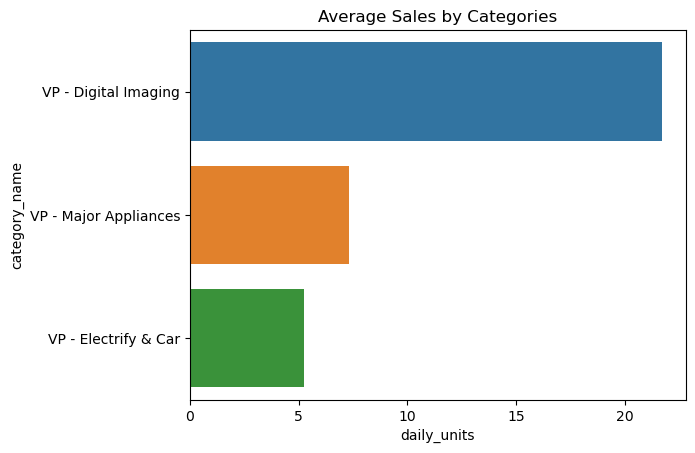

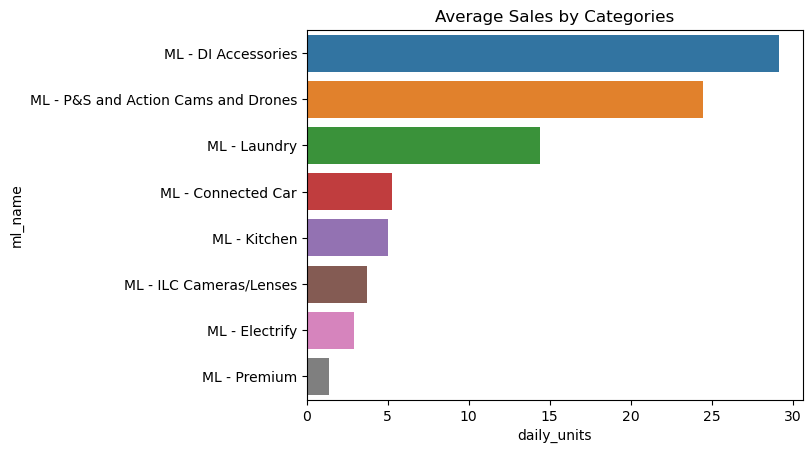

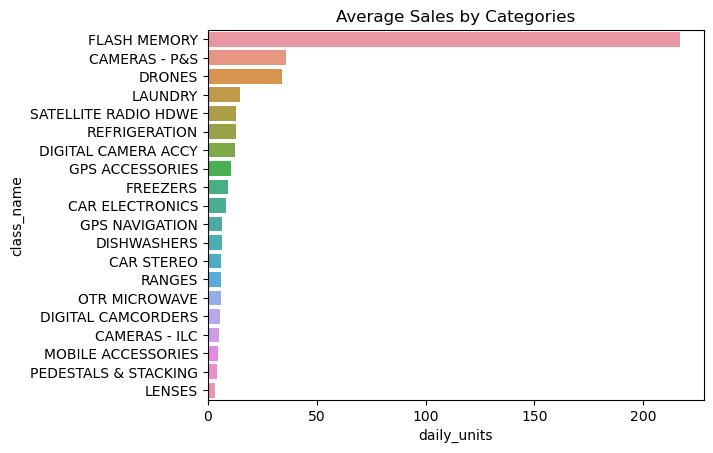

In [251]:
cats = [
    # "subclass_name", # exclude, too many values
    "class_name", "ml_name", "category_name"
    ]
cats = cats[::-1]
for cat in cats:
    dt = data.groupby(cat).agg({"daily_units": "mean"}).sort_values("daily_units", ascending=False).head(20)
    # horizontal bar plot
    sns.barplot(y=dt.index, x=dt.daily_units).set(title='Average Sales by Categories')
    # plt.xticks(rotation=90)
    plt.show()

There are a lot of variation in average daily units between different categories/sub categories.

In [242]:
data.head()

,encoded_sku_id,sales_date,subclass_name,class_name,ml_name,category_name,retail_price,promo_price,competitor_price,inventory,daily_units,real_price
0,1,2017-09-28,MISC CAMERA ACCES,DIGITAL CAMERA ACCY,ML - DI Accessories,VP - Digital Imaging,89.99,?,?,Fully-Stocked,1,89.99
1,2,2017-11-24,CAMERA BATTERIES,DIGITAL CAMERA ACCY,ML - DI Accessories,VP - Digital Imaging,39.99,?,?,Fully-Stocked,18,39.99
2,3,2019-11-28,SO PARTS,MOBILE ACCESSORIES,ML - Connected Car,VP - Electrify & Car,49.99,?,46.98,Constrained,7,49.99
3,4,2021-04-21,SO RANGEHOODS REG,KITCHEN VENTILATION,ML - Kitchen,VP - Major Appliances,549.99,?,498,Fully-Stocked,6,549.99
4,1,2018-10-27,MISC CAMERA ACCES,DIGITAL CAMERA ACCY,ML - DI Accessories,VP - Digital Imaging,89.99,?,?,Fully-Stocked,7,89.99


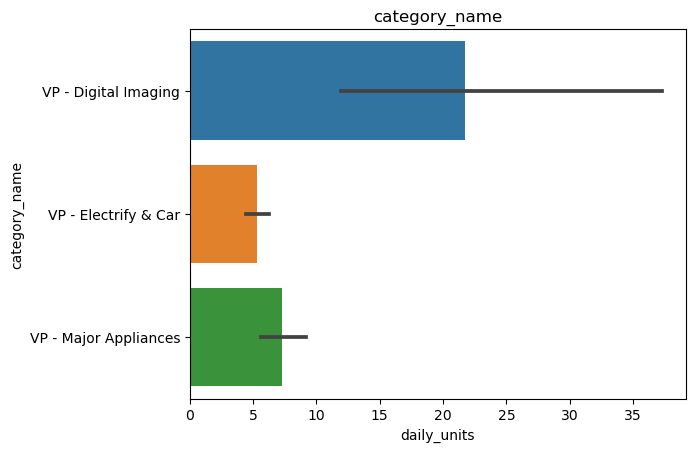

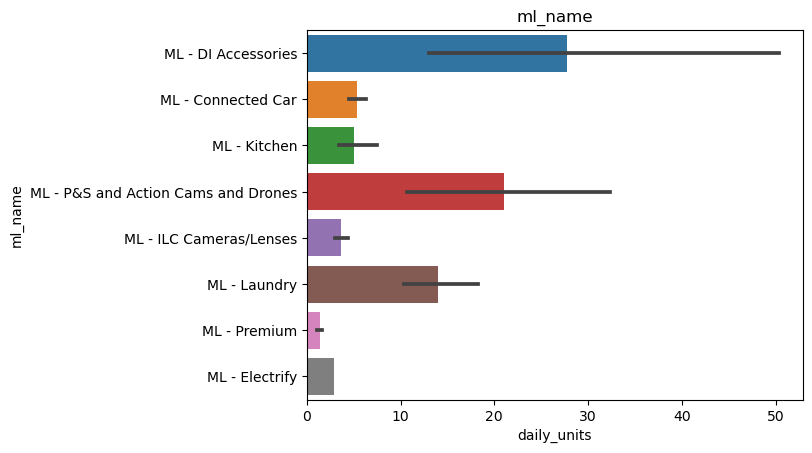

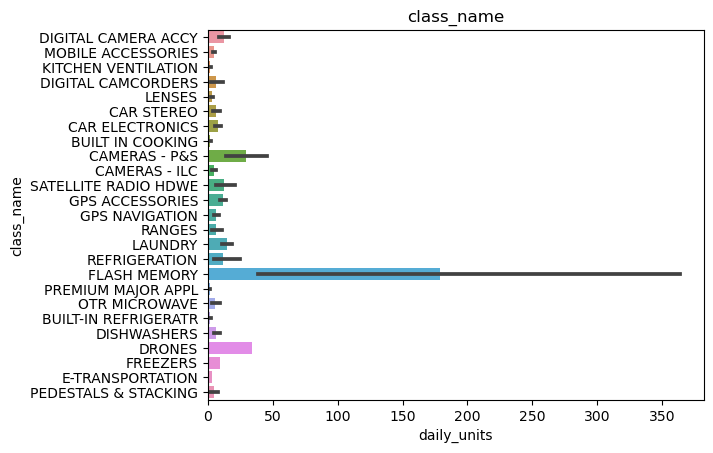

In [201]:
# Group data by sku
data_sku = data.groupby(["encoded_sku_id"] + cats).agg({"daily_units": "mean", "real_price": "mean", "sales_date": "count"}).reset_index()
data_sku.columns = ["encoded_sku_id"] + cats + ["daily_units", "real_price", "sales_date_count"]
# Plot the average and variation of daily units by cat
for cat in cats:
    sns.barplot(y=cat, x="daily_units", data=data_sku)
    plt.title(cat)
    plt.show()

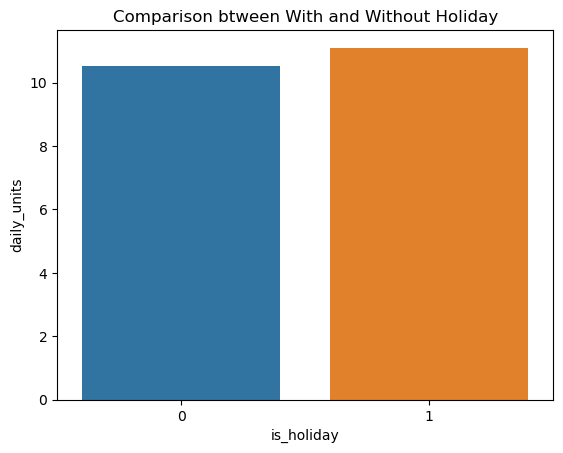

In [250]:
# holiday
dt = data.groupby(["is_holiday"]).agg({"daily_units": "mean"})
sns.barplot(y=dt.daily_units, x=dt.index)
plt.title("Comparison between With and Without Holiday")
plt.show()

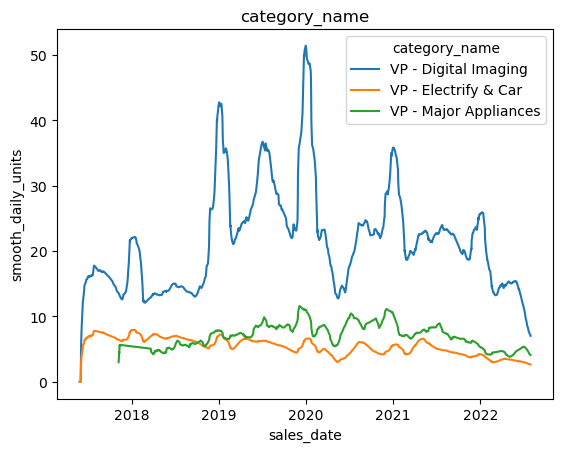

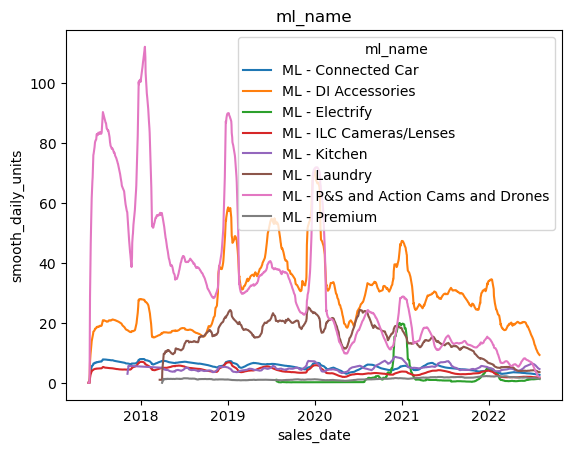

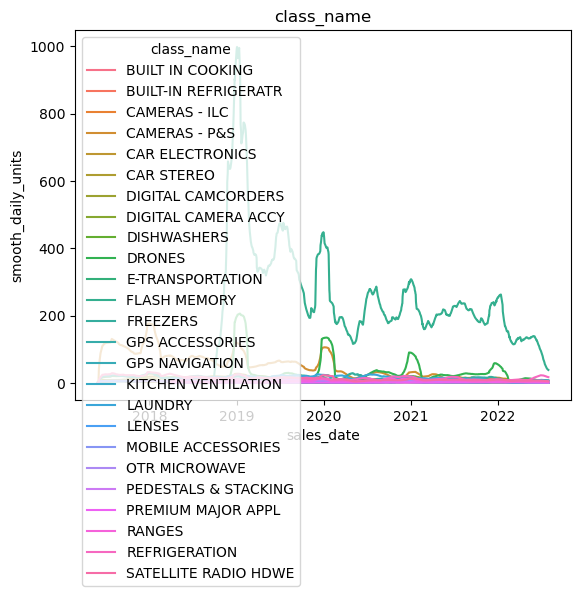

In [202]:
# plot line chart showing average daily_units by sales_date by cat
for cat in cats:
    dt_day = data.groupby(["sales_date", cat]).agg({"daily_units": "mean"}).reset_index()
    # Calculate data for a smooth line
    dt_day = dt_day.sort_values([cat, "sales_date"])
    data_day = dt_day[[cat, "sales_date", "daily_units"]].copy()
    data_day["smooth_daily_units"] = dt_day.groupby(cat).rolling(56, min_periods=1)["daily_units"].mean().reset_index(drop=True, level=0)
    sns.lineplot(x="sales_date", y="smooth_daily_units", hue=cat, data=data_day)
    plt.title(cat)
    plt.show()

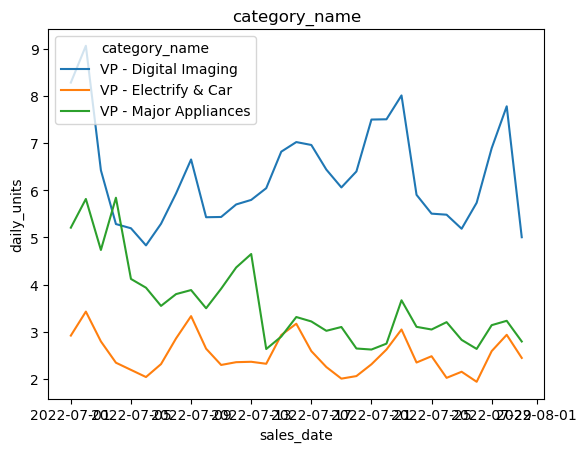

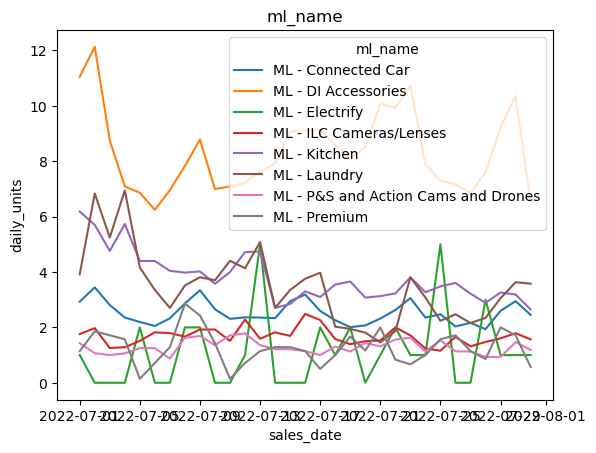

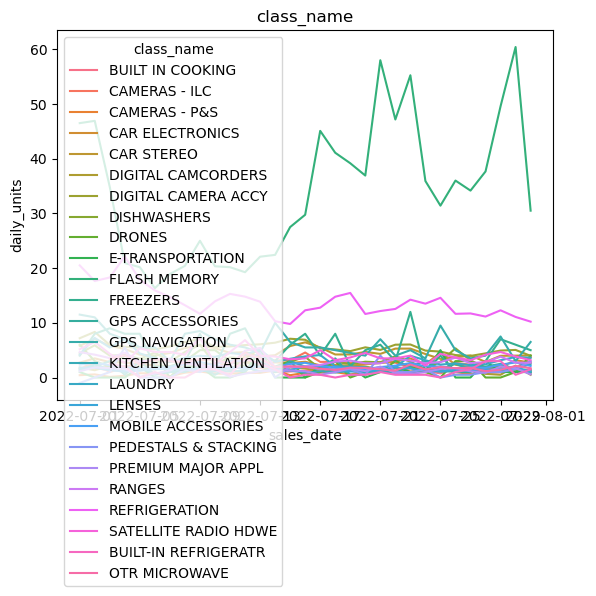

In [203]:
# plot line chart showing average daily_units by sales_date by cat
for cat in cats:
    dt_day = data.groupby(["sales_date", cat]).agg({"daily_units": "mean"}).reset_index()
    # Calculate data for a smooth line
    # dt_day = dt_day.sort_values([cat, "sales_date"])
    data_day = dt_day[[cat, "sales_date", "daily_units"]].copy()
    # data_day["smooth_daily_units"] = dt_day.groupby(cat).rolling(56, min_periods=1)["daily_units"].mean().reset_index(drop=True, level=0)
    sns.lineplot(x="sales_date", y="daily_units", hue=cat, data=data_day[data_day["sales_date"] >= "2022-07-01"])
    plt.title(cat)
    plt.show()

=> There is an obvious weekly trend here. Let's explore it more throughly

In [204]:
data.columns

Index(['encoded_sku_id', 'sales_date', 'subclass_name', 'class_name',
       'ml_name', 'category_name', 'retail_price', 'promo_price',
       'competitor_price', 'inventory', 'daily_units', 'real_price',
       'sales_date_dt', 'year', 'month', 'day', 'dayofweek', 'weekofyear',
       'quarter', 'is_weekend', 'is_holiday'],
      dtype='object')

In [205]:

times = ['year', 'month', 'day', 'dayofweek', 'weekofyear',
       'quarter', 'is_weekend', 'is_holiday']

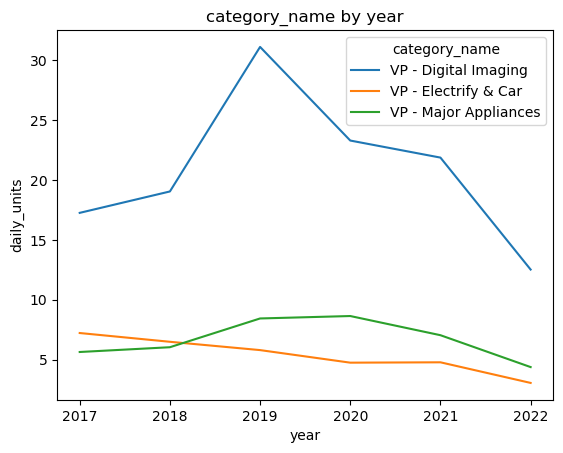

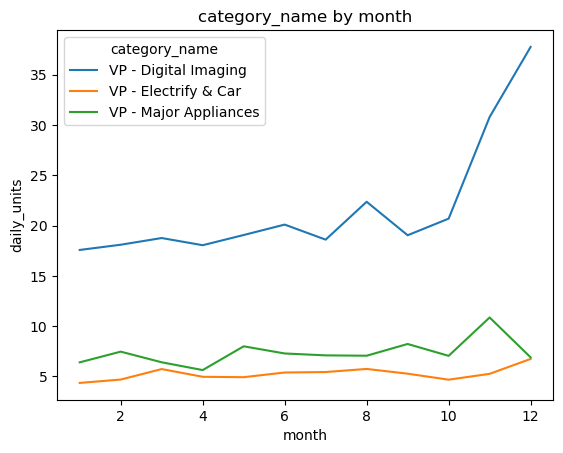

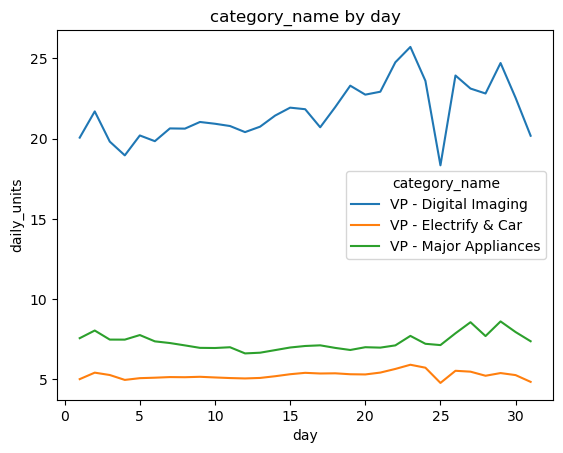

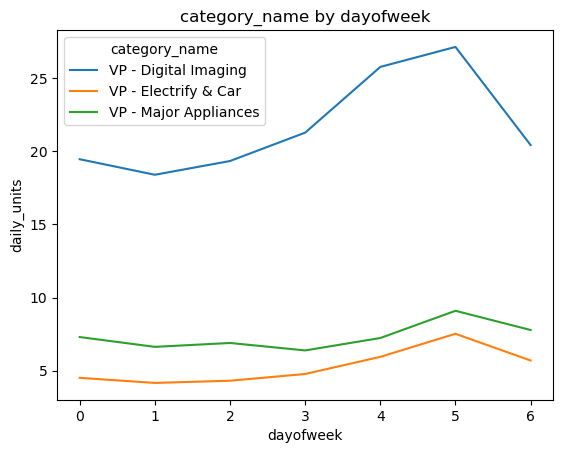

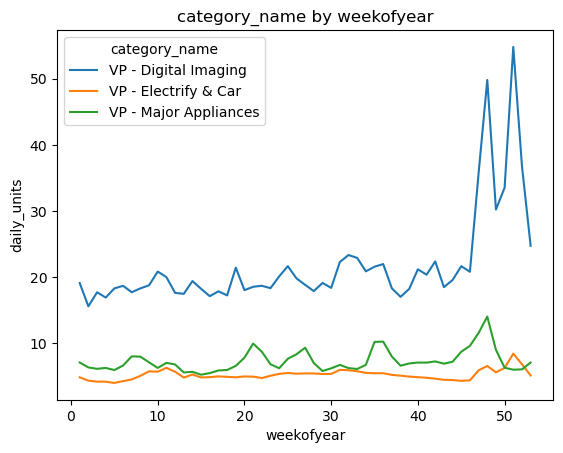

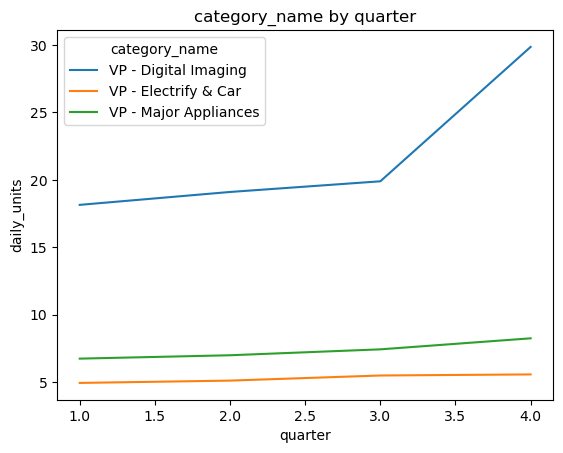

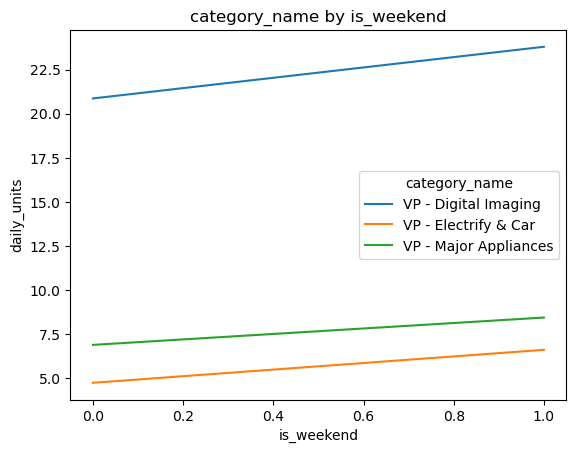

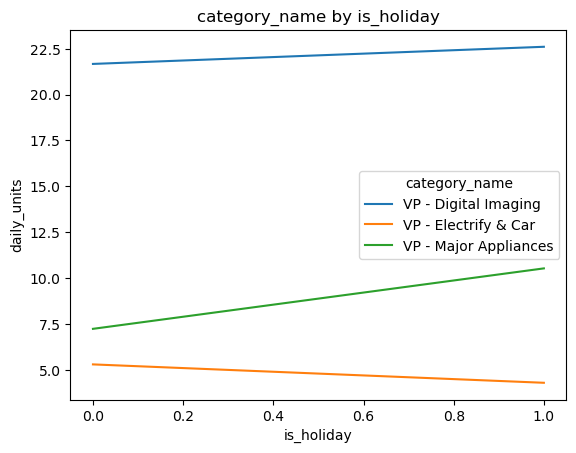

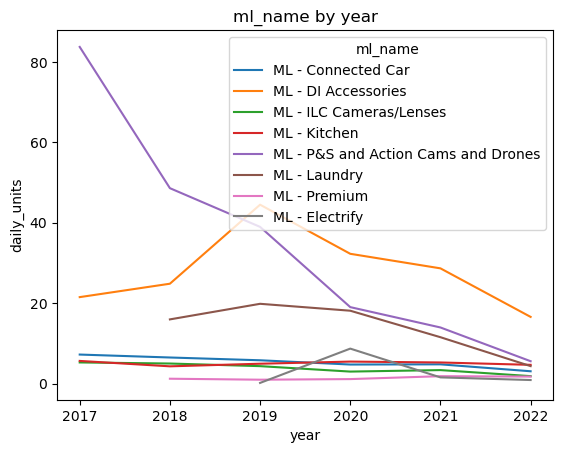

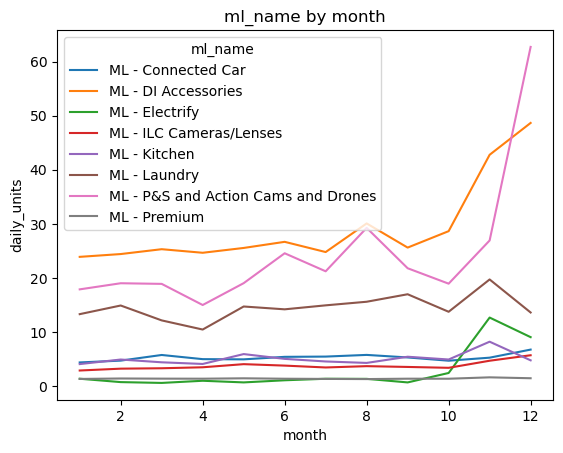

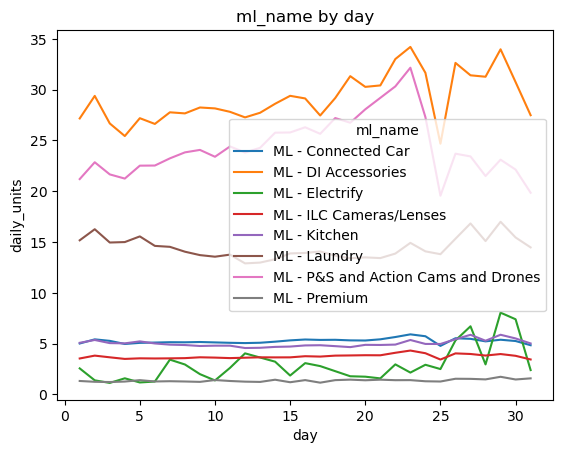

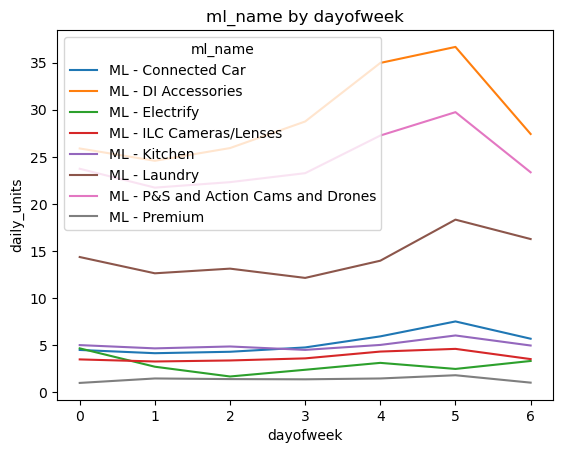

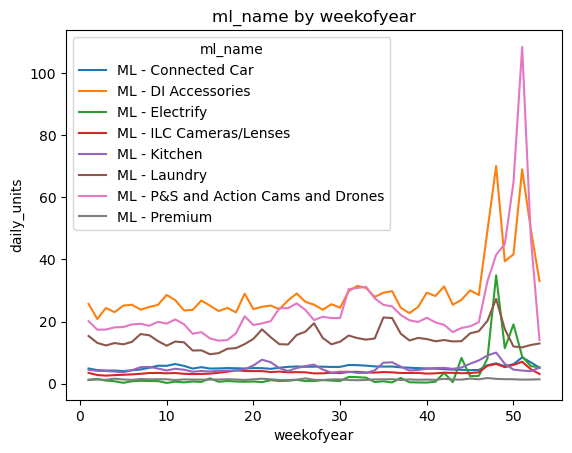

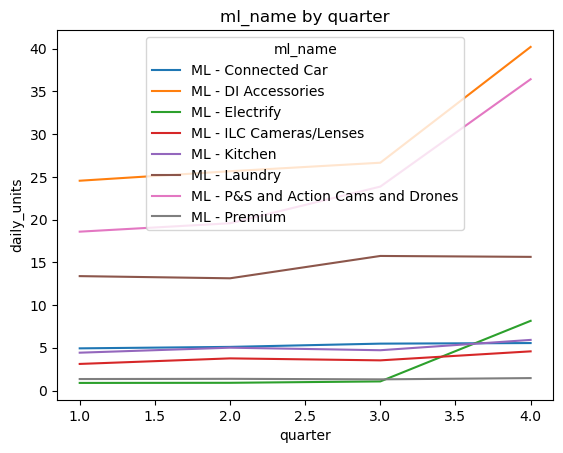

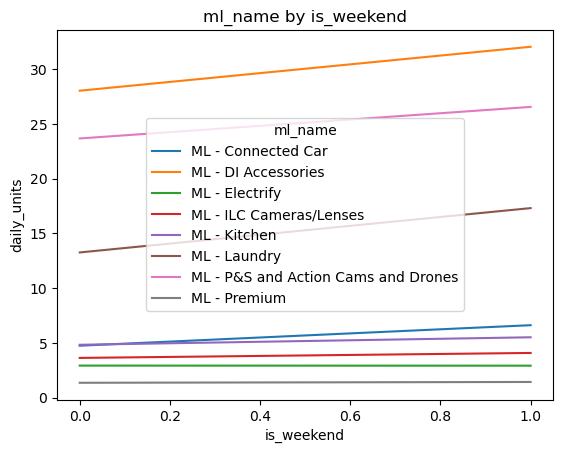

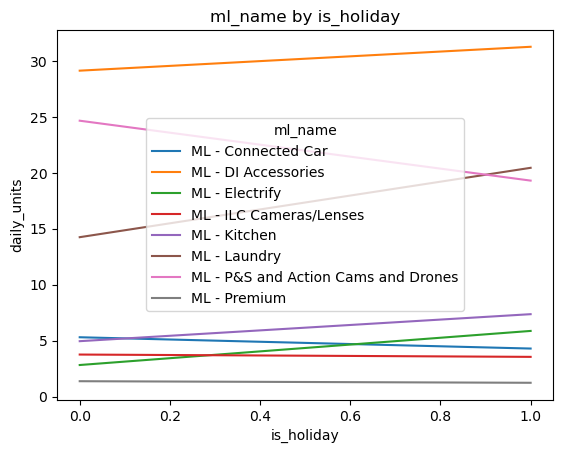

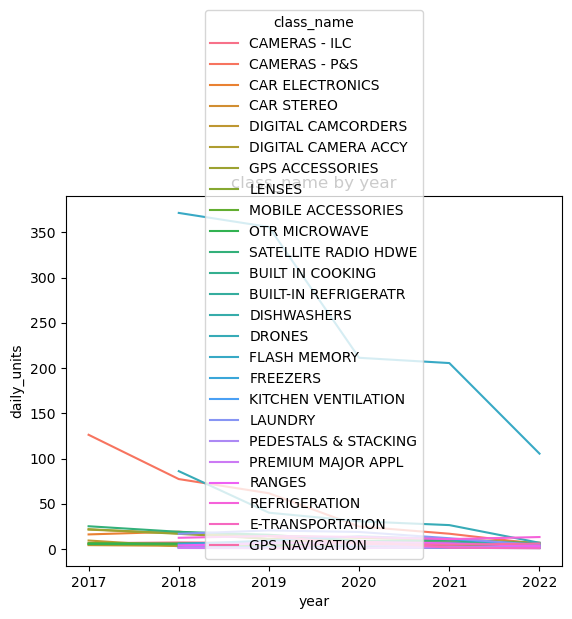

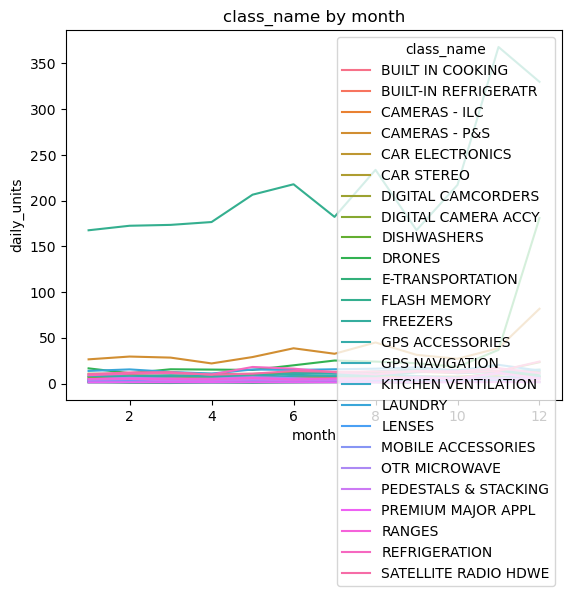

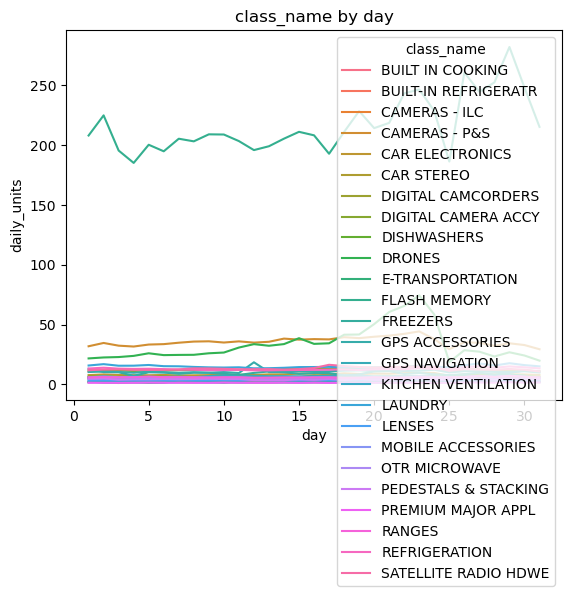

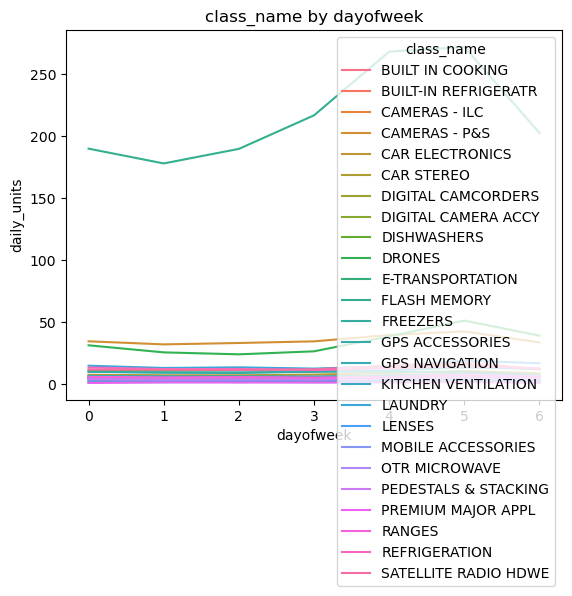

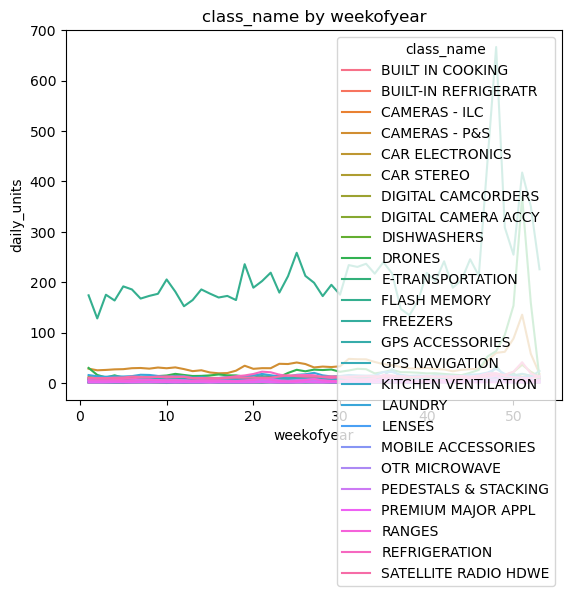

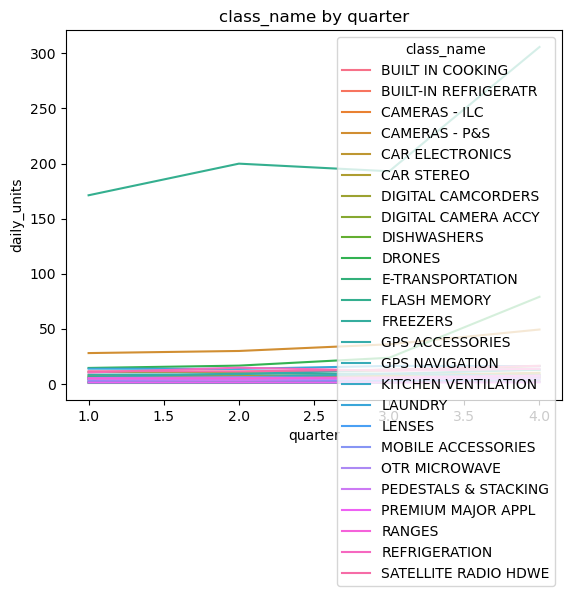

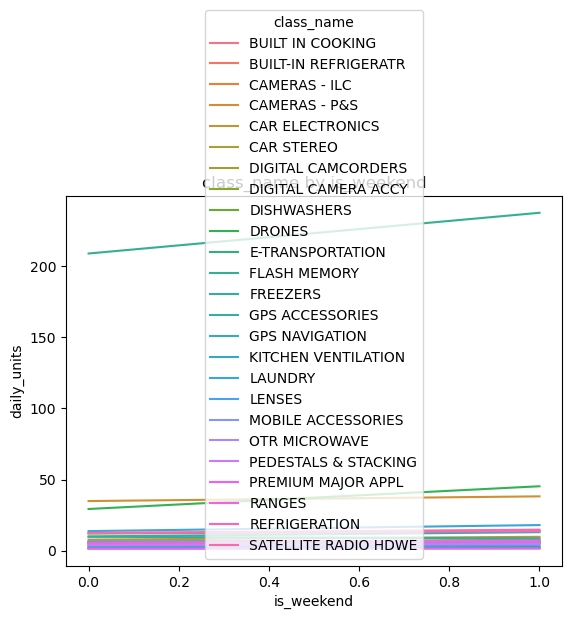

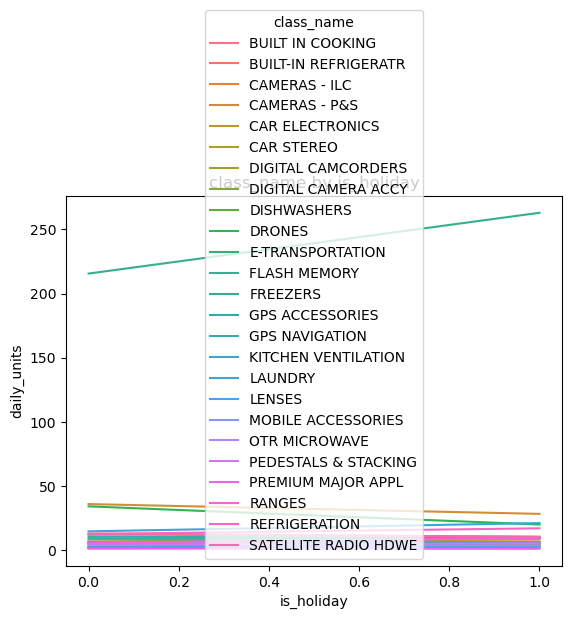

In [206]:
for cat in cats:
    for time in times:
        dt_time = data.groupby([time, cat]).agg({"daily_units": "mean"}).reset_index()
        # Plot line chart
        sns.lineplot(x=time, y="daily_units", hue=cat, data=dt_time)
        plt.title("{cat} by {time}".format(cat=cat, time=time))
        plt.show()

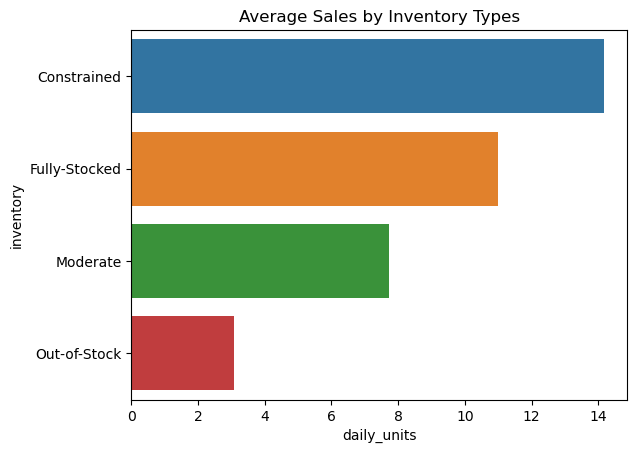

In [252]:
# bar chart by showing average daily_units by Incentory
cate = ["inventory"]
cate = cate[::-1]
for x in cate:
    dt = data.groupby(x).agg({"daily_units": "mean"}).sort_values("daily_units", ascending=False).head(20)
    sns.barplot(y=dt.index, x=dt.daily_units)
    plt.title("Average Sales by Inventory Types")
    plt.show()

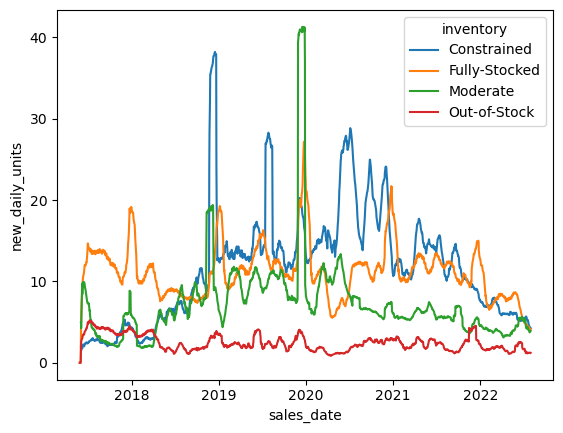

In [208]:
# line graph showing accumulated daily sales by month and inventory type
for a in cate:
    df_day = newdata.groupby(["sales_date", a]).agg({"daily_units": "mean"}).reset_index()
    df_day = df_day.sort_values([a, "sales_date"])
    data_day = df_day[[a, "sales_date", "daily_units"]].copy()
    data_day["new_daily_units"] = df_day.groupby(a).rolling(30, min_periods=1)["daily_units"].mean().reset_index(drop=True, level=0)
    sns.lineplot(x="sales_date", y="new_daily_units", hue=a, data=data_day)
 
    plt.show()

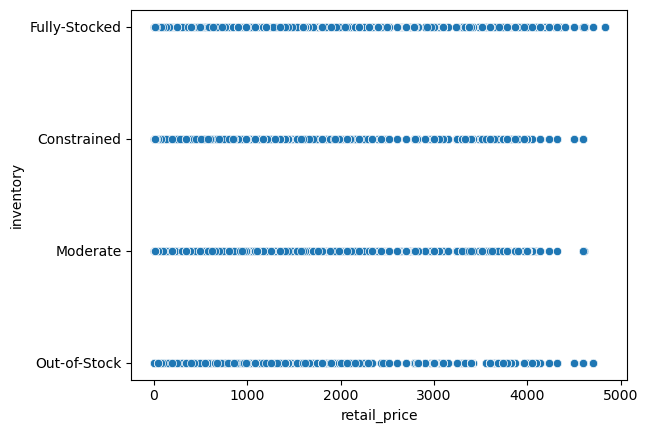

In [209]:
# Correlation between retail price and inventory type
sns.scatterplot(x="retail_price", y="inventory",data=newdata)
plt.show()

Exploration of other relationships


In [255]:
newdata = pd.read_excel('HackathonData.xlsx')


In [256]:
#Replace ? with blank
#data.loc[data["PROMO_PRICE"] == "?", "PROMO_PRICE"] = ""
newdata['PROMO_PRICE'].mask(newdata['PROMO_PRICE'] == '?', "", inplace=True)
newdata['COMPETITOR_PRICE'].mask(newdata['COMPETITOR_PRICE'] == '?', "", inplace=True)
#Replace blanks with Nan
newdata = newdata.replace(r'^\s*$', np.nan, regex=True)
newdata

,Encoded_SKU_ID,SALES_DATE,SUBCLASS_NAME,CLASS_NAME,ML_NAME,CATEGORY_NAME,RETAIL_PRICE,PROMO_PRICE,COMPETITOR_PRICE,Inventory,DAILY_UNITS
0,1,2017-09-28,MISC CAMERA ACCES,DIGITAL CAMERA ACCY,ML - DI Accessories,VP - Digital Imaging,89.99,NaN,NaN,Fully-Stocked,1
1,2,2017-11-24,CAMERA BATTERIES,DIGITAL CAMERA ACCY,ML - DI Accessories,VP - Digital Imaging,39.99,NaN,NaN,Fully-Stocked,18
2,3,2019-11-28,SO PARTS,MOBILE ACCESSORIES,ML - Connected Car,VP - Electrify & Car,49.99,NaN,46.98,Constrained,7
3,4,2021-04-21,SO RANGEHOODS REG,KITCHEN VENTILATION,ML - Kitchen,VP - Major Appliances,549.99,NaN,498.00,Fully-Stocked,6
4,1,2018-10-27,MISC CAMERA ACCES,DIGITAL CAMERA ACCY,ML - DI Accessories,VP - Digital Imaging,89.99,NaN,NaN,Fully-Stocked,7
...,...,...,...,...,...,...,...,...,...,...,...
846627,67,2020-11-16,DRONE ACCESSORY,DIGITAL CAMERA ACCY,ML - DI Accessories,VP - Digital Imaging,16.99,NaN,16.00,Fully-Stocked,0
846628,482,2021-05-06,MOBILE PHONE MEDIA,FLASH MEMORY,ML - DI Accessories,VP - Digital Imaging,17.99,NaN,NaN,Fully-Stocked,0
846629,384,2021-09-25,SO CAR ACCESSORIES,MOBILE ACCESSORIES,ML - Connected Car,VP - Electrify & Car,16.99,NaN,15.72,Fully-Stocked,3
846630,113,2018-11-08,CAMERA PRO PRODUCTS,DIGITAL CAMCORDERS,ML - P&S and Action Cams and Drones,VP - Digital Imaging,1899.99,NaN,NaN,Fully-Stocked,0


In [212]:
# Corr in total
price_corr =newdata[['RETAIL_PRICE', 'PROMO_PRICE', 'COMPETITOR_PRICE',"DAILY_UNITS"]].corr()['DAILY_UNITS'][:]
price_corr

RETAIL_PRICE       -0.039141
PROMO_PRICE        -0.122651
COMPETITOR_PRICE   -0.067289
DAILY_UNITS         1.000000
Name: DAILY_UNITS, dtype: float64

In [213]:
#Promo Corr
promo_corr = newdata[newdata['PROMO_PRICE'].notna()]
promo_corr
promo_corr = promo_corr.groupby("Encoded_SKU_ID")[['PROMO_PRICE','DAILY_UNITS']].corr().unstack().iloc[:,1]
promo_corr

Encoded_SKU_ID
1           NaN
2      0.501075
3           NaN
4     -0.102000
5           NaN
         ...   
567         NaN
570    0.057624
572   -0.609421
573    0.003355
575         NaN
Name: (PROMO_PRICE, DAILY_UNITS), Length: 519, dtype: float64

In [214]:
#Competitor Corr
comp_corr = newdata[newdata['COMPETITOR_PRICE'].notna()]
comp_corr = comp_corr.groupby("Encoded_SKU_ID")[['COMPETITOR_PRICE','DAILY_UNITS']].corr().unstack().iloc[:,1]
comp_corr

Encoded_SKU_ID
1      0.293975
2           NaN
3      0.070582
4     -0.416062
5     -0.003355
         ...   
571    0.260947
572   -0.340410
573    0.816050
574   -0.400201
575   -0.240231
Name: (COMPETITOR_PRICE, DAILY_UNITS), Length: 529, dtype: float64

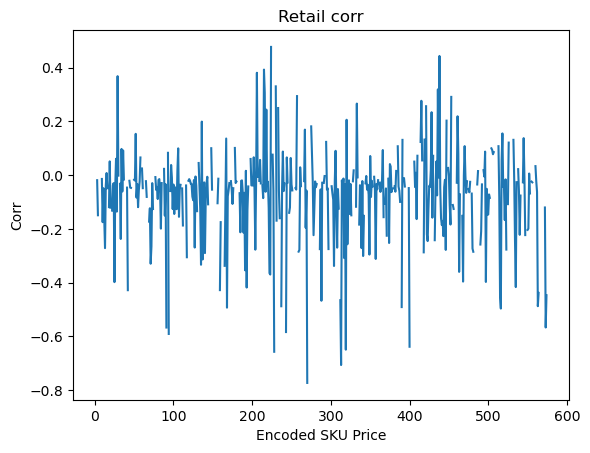

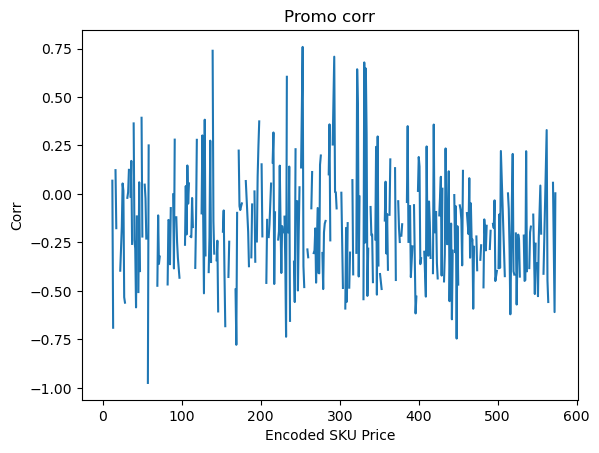

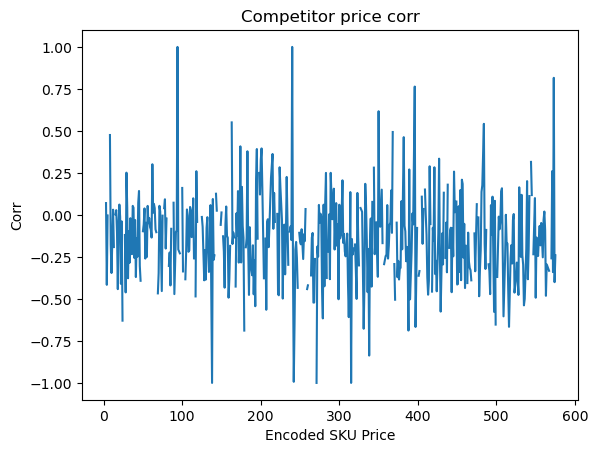

In [215]:
retail_corr = data.groupby("Encoded_SKU_ID")[['RETAIL_PRICE','DAILY_UNITS']].corr().unstack().iloc[:,1]
plt.plot(retail_corr)
plt.xlabel("Encoded SKU Price")
plt.ylabel("Corr")
plt.title("Retail corr")
plt.show()

#promo_corr = data.groupby("Encoded_SKU_ID")[['PROMO_PRICE','DAILY_UNITS']].corr().unstack().iloc[:,1]
plt.plot(promo_corr)
plt.title("Promo corr")
plt.xlabel("Encoded SKU Price")
plt.ylabel("Corr")
plt.show()

#comp_corr = data.groupby("Encoded_SKU_ID")[['COMPETITOR_PRICE','DAILY_UNITS']].corr().unstack().iloc[:,1]
plt.plot(comp_corr)
plt.title("Competitor price corr")
plt.xlabel("Encoded SKU Price")
plt.ylabel("Corr")
plt.show()

In [270]:
# Change nan to 0 and 1 where 0 is no promo and 1 is promo
promo_data = newdata.copy()
promo_data['PROMO_PRICE'] = np.where(promo_data[['PROMO_PRICE']].isnull(), 0, 1)
avg = promo_data.groupby(['Encoded_SKU_ID',"PROMO_PRICE"])['DAILY_UNITS'].mean()
avg

Encoded_SKU_ID  PROMO_PRICE
1               0               2.263046
                1               3.833333
2               0              12.009122
                1              19.846715
3               0               2.430837
                                 ...    
573             0               5.493964
                1              11.169811
574             0              22.082854
575             0               2.820183
                1              26.073298
Name: DAILY_UNITS, Length: 1094, dtype: float64

In [269]:
promo_corr = newdata[newdata['PROMO_PRICE'].notna()]
promo_corr

,Encoded_SKU_ID,SALES_DATE,SUBCLASS_NAME,CLASS_NAME,ML_NAME,CATEGORY_NAME,RETAIL_PRICE,PROMO_PRICE,COMPETITOR_PRICE,Inventory,DAILY_UNITS,has_promo,has_comp
21,22,2022-07-18,SO GAS COOKTOP REG,BUILT IN COOKING,ML - Kitchen,VP - Major Appliances,999.99,699.99,698.00,Moderate,4,Has Promotion Price,Has Competitor Price
22,24,2019-01-24,DIGITAL CAMERAS,CAMERAS - P&S,ML - P&S and Action Cams and Drones,VP - Digital Imaging,369.99,338.99,338.00,Fully-Stocked,32,Has Promotion Price,Has Competitor Price
29,31,2020-02-06,MIRRORLESS CAMERAS,CAMERAS - ILC,ML - ILC Cameras/Lenses,VP - Digital Imaging,1799.99,1599.99,1598.00,Fully-Stocked,3,Has Promotion Price,Has Competitor Price
39,40,2021-07-08,TUNERS,SATELLITE RADIO HDWE,ML - Connected Car,VP - Electrify & Car,149.99,129.99,99.99,Fully-Stocked,14,Has Promotion Price,Has Competitor Price
44,46,2019-05-15,MIRRORLESS LENSES,LENSES,ML - ILC Cameras/Lenses,VP - Digital Imaging,999.99,899.99,898.00,Fully-Stocked,7,Has Promotion Price,Has Competitor Price
...,...,...,...,...,...,...,...,...,...,...,...,...,...
846574,128,2020-09-19,FRONT LOAD WASHER,LAUNDRY,ML - Laundry,VP - Major Appliances,1799.99,1349.99,1398.00,Constrained,26,Has Promotion Price,Has Competitor Price
846580,438,2019-12-02,DSLR CAMERAS,CAMERAS - ILC,ML - ILC Cameras/Lenses,VP - Digital Imaging,2399.99,2099.99,2099.00,Fully-Stocked,8,Has Promotion Price,Has Competitor Price
846594,399,2019-04-30,SO DISHWASHER REG,DISHWASHERS,ML - Kitchen,VP - Major Appliances,339.99,324.99,318.00,Moderate,4,Has Promotion Price,Has Competitor Price
846604,89,2022-04-26,SO TL GAS DRY BBHD,LAUNDRY,ML - Laundry,VP - Major Appliances,944.99,849.99,696.00,Moderate,3,Has Promotion Price,Has Competitor Price


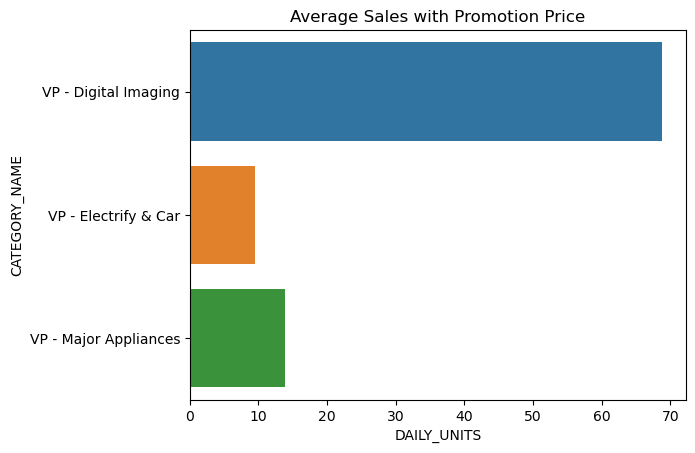

In [257]:
#Comparison of average daily sale for with and without promotion price
dt = promo_corr.groupby(["CATEGORY_NAME"]).agg({"DAILY_UNITS": "mean"})
sns.barplot(y=dt.index, x=dt.DAILY_UNITS)
plt.title("Average Sales with Promotion Price")

plt.show()

In [268]:
no_promo_corr = newdata[newdata['PROMO_PRICE'].isna()]
no_promo_corr

,Encoded_SKU_ID,SALES_DATE,SUBCLASS_NAME,CLASS_NAME,ML_NAME,CATEGORY_NAME,RETAIL_PRICE,PROMO_PRICE,COMPETITOR_PRICE,Inventory,DAILY_UNITS,has_promo,has_comp
0,1,2017-09-28,MISC CAMERA ACCES,DIGITAL CAMERA ACCY,ML - DI Accessories,VP - Digital Imaging,89.99,NaN,NaN,Fully-Stocked,1,No Promotion Price,No Competitor Price
1,2,2017-11-24,CAMERA BATTERIES,DIGITAL CAMERA ACCY,ML - DI Accessories,VP - Digital Imaging,39.99,NaN,NaN,Fully-Stocked,18,No Promotion Price,No Competitor Price
2,3,2019-11-28,SO PARTS,MOBILE ACCESSORIES,ML - Connected Car,VP - Electrify & Car,49.99,NaN,46.98,Constrained,7,No Promotion Price,No Competitor Price
3,4,2021-04-21,SO RANGEHOODS REG,KITCHEN VENTILATION,ML - Kitchen,VP - Major Appliances,549.99,NaN,498.00,Fully-Stocked,6,No Promotion Price,No Competitor Price
4,1,2018-10-27,MISC CAMERA ACCES,DIGITAL CAMERA ACCY,ML - DI Accessories,VP - Digital Imaging,89.99,NaN,NaN,Fully-Stocked,7,No Promotion Price,No Competitor Price
...,...,...,...,...,...,...,...,...,...,...,...,...,...
846627,67,2020-11-16,DRONE ACCESSORY,DIGITAL CAMERA ACCY,ML - DI Accessories,VP - Digital Imaging,16.99,NaN,16.00,Fully-Stocked,0,No Promotion Price,No Competitor Price
846628,482,2021-05-06,MOBILE PHONE MEDIA,FLASH MEMORY,ML - DI Accessories,VP - Digital Imaging,17.99,NaN,NaN,Fully-Stocked,0,No Promotion Price,No Competitor Price
846629,384,2021-09-25,SO CAR ACCESSORIES,MOBILE ACCESSORIES,ML - Connected Car,VP - Electrify & Car,16.99,NaN,15.72,Fully-Stocked,3,No Promotion Price,No Competitor Price
846630,113,2018-11-08,CAMERA PRO PRODUCTS,DIGITAL CAMCORDERS,ML - P&S and Action Cams and Drones,VP - Digital Imaging,1899.99,NaN,NaN,Fully-Stocked,0,No Promotion Price,No Competitor Price


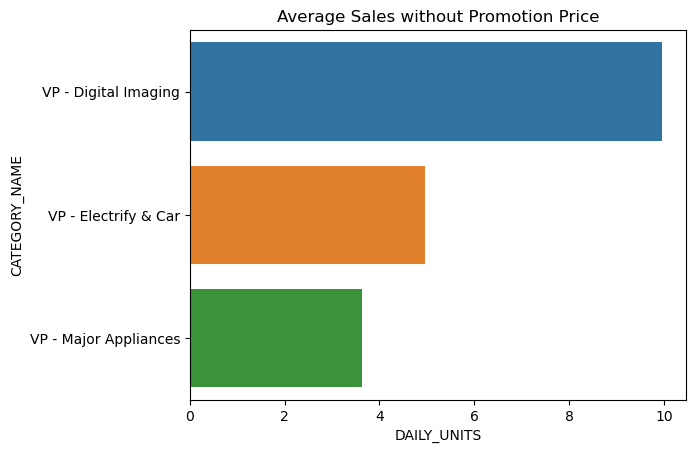

,DAILY_UNITS
CATEGORY_NAME,
VP - Digital Imaging,9.964946
VP - Electrify & Car,4.972586
VP - Major Appliances,3.623012


In [220]:
#Comparison of average daily sale for with and without promotion price
dt = no_promo_corr.groupby(["CATEGORY_NAME"]).agg({"DAILY_UNITS": "mean"})
sns.barplot(y=dt.index, x=dt.DAILY_UNITS)
plt.title("Average Sales without Promotion Price")
plt.show()
dt

In [264]:
#Combine two graphs into one
newdata["has_promo"]= "Has Promotion Price"
newdata.loc[newdata.PROMO_PRICE.isna(),"has_promo" ] = "No Promotion Price"



In [222]:
dt

,DAILY_UNITS
CATEGORY_NAME,
VP - Digital Imaging,9.964946
VP - Electrify & Car,4.972586
VP - Major Appliances,3.623012


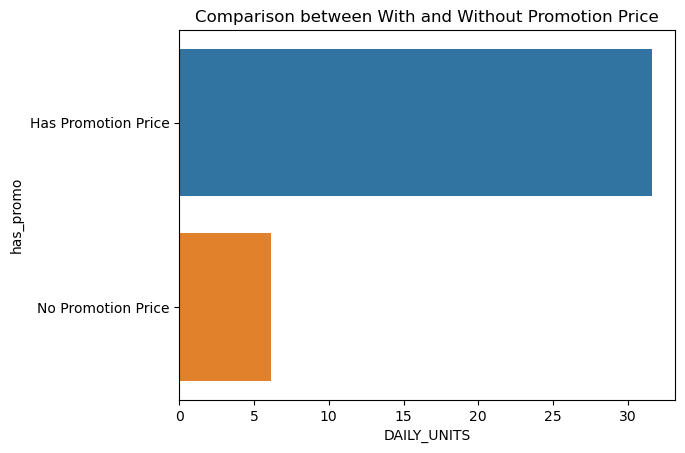

In [265]:
dt = newdata.groupby(["has_promo"]).agg({"DAILY_UNITS": "mean"})
sns.barplot(y=dt.index, x=dt.DAILY_UNITS)
plt.title("Comparison between With and Without Promotion Price")
plt.show()

In [266]:
#Combine two graphs into one

newdata["has_comp"]= "Has Competitor Price"
newdata.loc[newdata.PROMO_PRICE.isna(),"has_comp" ] = "No Competitor Price"
newdata["has_comp"].nunique()

2

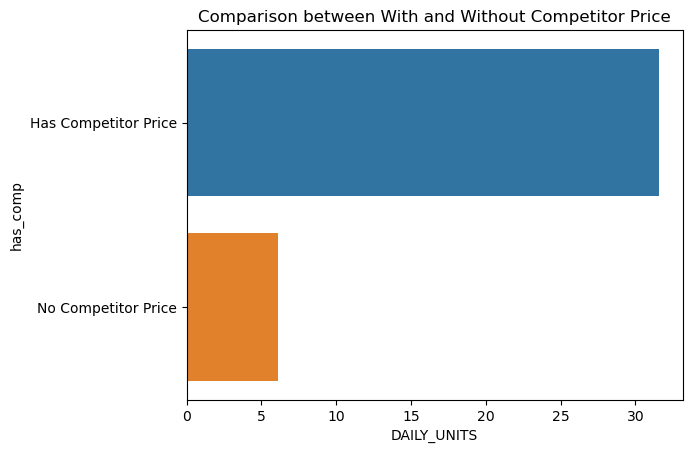

In [267]:
dt = newdata.groupby(["has_comp"]).agg({"DAILY_UNITS": "mean"})
sns.barplot(y=dt.index, x=dt.DAILY_UNITS)
plt.title("Comparison between With and Without Competitor Price")
plt.show()